#MULTIPLE LINEAR REGRESSION

#Exploratory Data Analysis (EDA)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv('ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


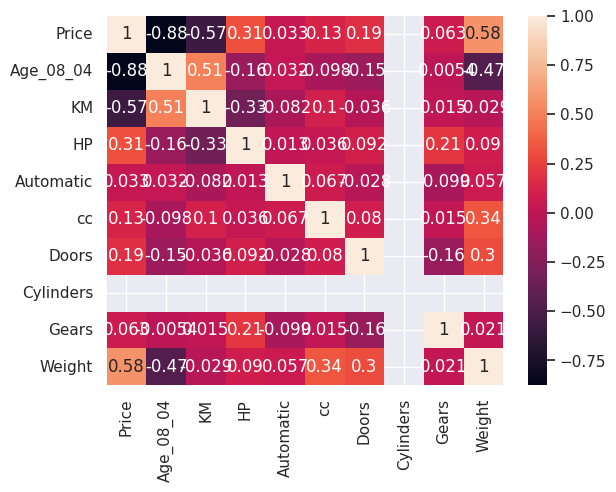

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
if 'Transmission' in data.columns:
    corr_matrix = data.drop(['Fuel_Type', 'Transmission'], axis=1).corr()
else:
    print("Column 'Transmission' does not exist in the dataset.")

Column 'Transmission' does not exist in the dataset.


In [ ]:
corr_matrix = data.drop(['Fuel_Type', 'Transmission'], axis=1, errors='ignore').corr()

In [ ]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Automatic'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                   Coefficient
Age_08_04        -1.208305e+02
KM               -1.623141e-02
HP                1.403948e+01
cc               -3.037219e-02
Doors            -6.031097e+01
Cylinders        -4.547474e-13
Gears             5.516007e+02
Weight            2.588496e+01
Fuel_Type_Diesel -6.854876e+01
Fuel_Type_Petrol  1.370809e+03
Automatic_1       1.488309e+02


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")

MSE: 2203043.823143701, R2: 0.8348888040611083


In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

#Question 1: What is Normalization & Standardization and how is it helpful?

Normalization and standardization are essential concepts in data preprocessing. Normalization is the process of scaling numeric data to a common range, usually between 0 and 1, to prevent features with large ranges from dominating the model. This is particularly important in algorithms that use distance or similarity measures, such as k-nearest neighbors or clustering.

The benefits of normalization include:

Reducing the effect of outliers
Improving model performance by reducing the impact of features with large ranges
Enhancing interpretability of results
There are different normalization techniques, including min-max scaling, z-score normalization, and log scaling.

Standardization is a specific type of normalization that subtracts the mean and divides by the standard deviation for each feature. This process is also known as Z-scoring. Standardization helps to remove the effect of units of measurement, make features more comparable, and improve model performance by reducing the impact of features with different scales.

#Question 2: What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables in a multiple linear regression model are highly correlated, leading to unstable estimates of the regression coefficients. To address multicollinearity, the following techniques can be used:

Remove one of the correlated variables
Use dimensionality reduction techniques, such as principal component regression (PCR) or partial least squares regression (PLS)
Use regularization techniques, such as ridge regression or the lasso
Use a correlation matrix to identify highly correlated variables and remove or transform them accordingly
Use a variance inflation factor (VIF) to identify highly correlated variables and remove or transform them accordingly
Use a stepwise regression approach to select the most important variables and reduce multicollinearity.

These techniques can help address multicollinearity in multiple linear regression and improve the stability and accuracy of the model.